In [3]:
import pandas as pd
import matplotlib.pyplot as plt


**Read in csv file**

In [4]:
df = pd.read_csv('Pedestrian.csv')
rows, cols = df.shape
print("Number of Rows:", rows, "\nNumber of Columns:", cols)

Number of Rows: 127277 
Number of Columns: 20


In [5]:
df.head()

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,street,segmentid,Rank,PMP_ID,NTA2020,Boro,Category,NTAName,FEMAFldz,FEMAFldT,HrcEvac,SHAPE_Leng
0,MULTILINESTRING ((-73.81665096623519 40.674537...,4,Queens,410,"28,32",31,10,5,122 STREET,55131,4,52434,QN1001,QN,Community,South Ozone Park,X,AREA OF MINIMAL FLOOD HAZARD,"5,6",326.224892
1,MULTILINESTRING ((-74.25422309679644 40.506165...,5,Staten Island,503,51,62,24,11,WARDS POINT AVENUE,16,5,79811,SI0305,SI,Baseline,Tottenville-Charleston,X,AREA OF MINIMAL FLOOD HAZARD,2,133.964227
2,MULTILINESTRING ((-73.82885385076081 40.698186...,4,Queens,409,29,24,14,5,120 STREET,56031,5,50784,QN0902,QN,Baseline,Richmond Hill,X,AREA OF MINIMAL FLOOD HAZARD,NaN,220.503354
3,MULTILINESTRING ((-73.78519954748839 40.718913...,4,Queens,408,24,24,"11,14",5,CROYDON ROAD,180320,5,49677,QN0804,QN,Baseline,Jamaica Estates-Holliswood,X,AREA OF MINIMAL FLOOD HAZARD,NaN,33.180523
4,MULTILINESTRING ((-74.15639270712379 40.632493...,5,Staten Island,501,49,61,23,11,MAPLE PARKWAY,8394,4,70756,SI0107,SI,Community,Mariner's Harbor-Arlington-Graniteville,X,AREA OF MINIMAL FLOOD HAZARD,"5,6",410.317355


**Filter to only include Manhattan streets**

In [6]:
df = df[df['BoroName'] == 'Manhattan']

**Feature Selection**

In [7]:
print(df.nunique())

the_geom      11520
BoroCode          1
BoroName          1
BoroCD           52
CounDist         34
AssemDist        39
StSenDist        17
CongDist         11
street          774
segmentid     11537
Rank              5
PMP_ID         6489
NTA2020          33
Boro              2
Category          5
NTAName         147
FEMAFldz          6
FEMAFldT          6
HrcEvac          57
SHAPE_Leng    11519
dtype: int64


**Filter by only necessary features**

In [8]:
df = df[['the_geom', 'street', 'Rank']]
df

,the_geom,street,Rank
9,MULTILINESTRING ((-73.97579823470531 40.740644...,EAST 29 STREET,3
164,MULTILINESTRING ((-73.93525789432428 40.826628...,WEST 153 STREET,4
212,MULTILINESTRING ((-73.95206219664077 40.827079...,WEST 145 STREET,2
213,MULTILINESTRING ((-73.95206219664077 40.827079...,WEST 145 STREET,2
225,MULTILINESTRING ((-73.98846189505852 40.774044...,WEST 63 STREET,3
...,...,...,...
127214,MULTILINESTRING ((-73.94724958773912 40.763302...,UNNAMED STREET,4
127215,MULTILINESTRING ((-73.94355733177174 40.769270...,UNNAMED STREET,4
127272,MULTILINESTRING ((-73.9390500160296 40.7992559...,3 AVENUE,2
127273,MULTILINESTRING ((-73.93153623629156 40.800518...,PALADINO AVENUE,4


**Check for null values**

In [9]:
df.isna().sum()

the_geom    0
street      0
Rank        0
dtype: int64

**Extract coordinates and find average from 'the_geom' column**

In [10]:
# Work on copy to remove SettingWithCopyWarning
df = df.copy() 

# Step 1: Clean 'the_geom' column
df.loc[:, 'the_geom'] = df['the_geom'].str.replace(r'MULTILINESTRING \(\(|\)\)', '', regex=True)

# Step 2: Split coordinates into a new 'coords' column using .str.split()
df.loc[:, 'coords'] = df['the_geom'].str.split(', ')

# Step 3: Define function to calculate average x and y coordinates
def calculate_average(coords):
    """Calculate the average x and y coordinates from a list of coordinate strings."""
    coords = [float(coord) for coord in coords]
    avg_x = sum(coords[::2]) / (len(coords) // 2)
    avg_y = sum(coords[1::2]) / (len(coords) // 2)
    return avg_x, avg_y

# Step 4: Apply calculate_average function and assign to 'avg_x' and 'avg_y' columns
df[['avg_x', 'avg_y']] = df['coords'].apply(lambda x: pd.Series(calculate_average([item for pair in x for item in pair.split()])))

# Step 5: Drop 'coords' and 'the_geom' columns
df.drop(columns=['coords', 'the_geom'], inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(50)

,street,Rank,avg_x,avg_y
0,EAST 29 STREET,3,-73.975106,40.740360
1,WEST 153 STREET,4,-73.935324,40.826656
2,WEST 145 STREET,2,-73.952334,40.827183
3,WEST 145 STREET,2,-73.952334,40.827183
4,WEST 63 STREET,3,-73.988514,40.774067
5,WEST 63 STREET,3,-73.987870,40.773788
6,WEST 63 STREET,3,-73.987870,40.773788
7,WEST 63 STREET,3,-73.987577,40.773661
8,WEST 63 STREET,3,-73.987689,40.773710
9,WEST 63 STREET,3,-73.988072,40.773876


**Convert features to appropriate data types**

In [11]:
df.dtypes

street     object
Rank        int64
avg_x     float64
avg_y     float64
dtype: object

**Convert street to category type**

In [12]:
df['street'] = df['street'].astype('category')

**Remove duplicate rows as average x and y coordinates shouldn't be duplicated**

In [13]:
# Check for duplicate rows
print('Number of duplicate rows before duplicates dropped:', df.duplicated().sum())

# Duplicate rows dropped as likely data entry errors
df = df.drop_duplicates()

print('Number of duplicate rows after duplicates dropped:', df.duplicated().sum())

Number of duplicate rows before duplicates dropped: 3152
Number of duplicate rows after duplicates dropped: 0


**Plot the streets onto map**

In [18]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

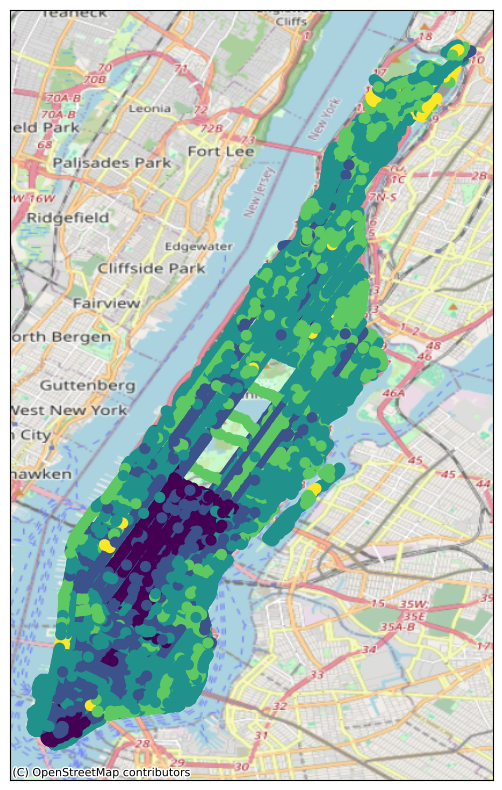

In [27]:
geometry = [Point(xy) for xy in zip(df['avg_x'], df['avg_y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticks([])
ax.set_yticks([])

# Plotting points based on Rank 
gdf.plot(ax=ax, column='Rank', legend=False, markersize=50, cmap='viridis')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.savefig('StreetBusyness.png')
plt.show()